# Profisor Services - Case Study 

## Client Situation:

Our client, an Indian Healthcare firm, wants us to analyse social media data for understanding their patients’ concerns.  Driving a Natural Language Processing (NLP) solutions, we are expected to cleanse and cluster social media data obtained from their facebook page for text mining and deriving meaning from that data.  You are expected to identify noise elements that are not relevant for NLP and remove them (for example, stop-words, special characters, etc.) from the given data set and then cluster the data determining key topics that are discussed on the facebook page – for example, a creative topic modelling and or word cloud based solution.

## Approach:

The case study is based on analysing social media data and the task is to understand pateint's concern on the basis of their reviews. As we don't have any category or label for the given dataset. So it is a unsupervised Machine Learning Problem. So, I will be using NLTK package for preprocessing the text data and will try to find the insights and how we can cluster the text.

In [17]:
# Import all the necessary packages 
import pandas as pd
import re

#Preprocessing packages
import nltk
from nltk.tokenize import TreebankWordTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from string import punctuation

#Visulaization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

# Model Package
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans


In [18]:
# Convert the csv file to dataframe
df = pd.read_csv('/home/nikita/Documents/NLP-master/sentences.csv', encoding="UTF-8")
df.head()

,comment_id,comment_message
0,1538183672909402_1541895645871538,b'Thanks big fan here'
1,1540621789332257_1540637829330653,b'Reminded of trika butterfly'
2,1540621789332257_1540640095997093,b'BEST WISHES FOR CELEBRATING... 34 YEARS..OF ...
3,1540621789332257_1540672129327223,b'Congrats'
4,1540621789332257_1540753779319058,b'Congrats'


In [19]:
# Understanding Text Data
df

,comment_id,comment_message
0,1538183672909402_1541895645871538,b'Thanks big fan here'
1,1540621789332257_1540637829330653,b'Reminded of trika butterfly'
2,1540621789332257_1540640095997093,b'BEST WISHES FOR CELEBRATING... 34 YEARS..OF ...
3,1540621789332257_1540672129327223,b'Congrats'
4,1540621789332257_1540753779319058,b'Congrats'
5,1540621789332257_1540781092649660,b'Congratulations'
6,1540621789332257_1541729175888185,b'Congratulations Apollo hospital...'
7,1540621789332257_1541754942552275,b'I will never forget the first class treatmen...
8,1540621789332257_1542346075826495,"b""Best wishes..and I'm so happy that I was a p..."
9,1538180652909704_1539762569418179,b'Good Information which will help in curing p...


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 2 columns):
comment_id         5334 non-null object
comment_message    5334 non-null object
dtypes: object(2)
memory usage: 83.4+ KB


__The dataset has 5334 for rows and two columns. 1st column is comment_id and 2nd column is comment_message__

In comment_message column we have a 'b' unicode before text message parenthases. So we need to clean the text and remove the unicode b' . 

In [21]:
# Remove b' unicode from comment_message column
df['comment_message'] = df['comment_message'].apply(lambda x: x[1:])

In [46]:
df.head(20)

,comment_id,comment_message
0,1538183672909402_1541895645871538,'Thanks big fan here'
1,1540621789332257_1540637829330653,'Reminded of trika butterfly'
2,1540621789332257_1540640095997093,'BEST WISHES FOR CELEBRATING... 34 YEARS..OF T...
3,1540621789332257_1540672129327223,'Congrats'
4,1540621789332257_1540753779319058,'Congrats'
5,1540621789332257_1540781092649660,'Congratulations'
6,1540621789332257_1541729175888185,'Congratulations Apollo hospital...'
7,1540621789332257_1541754942552275,'I will never forget the first class treatment...
8,1540621789332257_1542346075826495,"""Best wishes..and I'm so happy that I was a pa..."
9,1538180652909704_1539762569418179,'Good Information which will help in curing pr...


In [23]:
df.describe()

,comment_id,comment_message
count,5334,5334
unique,5334,3497
top,933282400066202_933698950024547,'A'
freq,1,122


__df.describe() gives the insights of the text dataset. The total messages are 5334 out of which only 3497 are unique messages.__

Another important point to notice before proceeding with NLP preprocessing steps is that the given test data contains special characters i.e Emojis so we need to deal with them and will try replacing them with "" (empty string). 

In [24]:
#Creating a string of special characters used i.e. Emoji
tmp_str = df.iloc[26]['comment_message']
tmp_str

u"'Congratulations Madam \\xf0\\x9f\\x92\\x90Stay Blessed:)'"

In [25]:
# Using Regex to remove emojis
def replace_emojis(in_str):
    return re.sub(r'\\x[0-9A-Fa-f]*','', in_str)

In [26]:
replace_emojis(tmp_str)

u"'Congratulations Madam Stay Blessed:)'"

In [27]:
# Applying the function on the comment_message column.
df['comment_message'] = df['comment_message'].apply(replace_emojis)

In [28]:
# df['comment_message'] = map(lambda x: x.decode('utf-8').replace(u'\xf1', 'n'), df['comment_message'].str)

### Choosing the comment_message as feature and dropping comment_id column which is not useful for analysing the text data.

In [29]:
X = df['comment_message']

In [30]:
X

0                                 'Thanks  big  fan here'
1                           'Reminded of trika butterfly'
2       'BEST WISHES FOR CELEBRATING... 34 YEARS..OF T...
3                                              'Congrats'
4                                              'Congrats'
5                                       'Congratulations'
6                    'Congratulations Apollo hospital...'
7       'I will never forget the first class treatment...
8       "Best wishes..and I'm so happy that I was a pa...
9       'Good Information which will help in curing pr...
10                                     'Good information'
11                                                ':) <3'
12                     'This  is only for brain...ah ...'
13                                'Irritating management'
14                              'thanks for keep up info'
15                                                ':) <3'
16      'posts  about  are why  everyone likes social ...
17            

For preprocessing the feature column, First convert each sentence into token by using tokenization and then remove the english stop words and then take only root words and remove similar meaning words by using stemming.

In [31]:
def preprocess(X):
    #create english stop word list
    en_stop = get_stop_words('en')
    stemmer = PorterStemmer()
    tokenize = TreebankWordTokenizer()
    
    
    X = X.apply(lambda row: tokenize.tokenize(row)) # do tokenization
    X = X.apply(lambda row: [i for i in row if i not in en_stop]) # remove english stop words
    X = X.apply(lambda row :[i for i in row if i not in punctuation]) #remove punctuation
    X = X.apply(lambda row:[stemmer.stem(word) for word in row])      # Stemming
    return X

X = preprocess(X)
X

0                                      ['thank, big, fan]
1                             ['remind, trika, butterfli]
2       ['best, wish, for, celebr, ..., 34, years..of,...
3                                              ['congrat]
4                                              ['congrat]
5                                            ['congratul]
6                       ['congratul, apollo, hospit, ...]
7       ['I, will, never, forget, first, class, treatm...
8       [``, best, wishes..and, I, 'm, happi, I, part,...
9       ['good, inform, will, help, cure, problem, bon...
10                                        ['good, inform]
11                                                    [3]
12                            ['thi, brain, ..., ah, ...]
13                                        ['irrit, manag]
14                                   ['thank, keep, info]
15                                                    [3]
16                  ['post, everyon, like, social, media]
17            

## Visualize the Feature variables by using Word cloud

WordClouds are a quick way to check the result of our preprocessing steps and debug them.

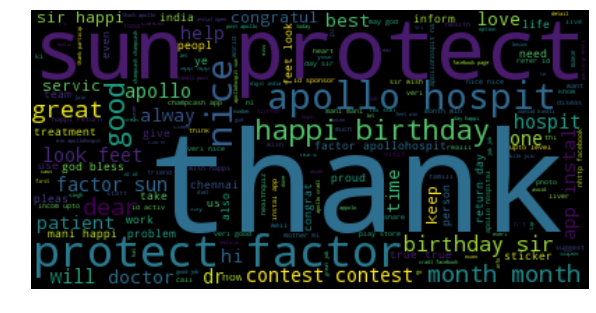

In [32]:
def wordCloud(X):
    text = []
    for i in range(len(X)):
        text = text + [i for i in X[i]]
    textall = " ".join(text)
    wordcloud = WordCloud(max_font_size=100).generate(textall)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    return plt.show()

wordCloud(X)

From the above word cloud , we can clearly see that maximum messages in the given text data contains 'thank', 'protect','apollo' etc words. So these are the maximum occuring words out of all the messages. So we can assume that given text data is related to appolo hospital and most of the pateint have given good review about the hospital( words like thank, good, nice happy, protect are clearly visible with large fonts). 
It is a power tool to visualize and understand our text data more clearly. We get a clear idea from it and now we will try to cluster the text.

## Creating Sparse matrix by using count vectorizer and TF-IDF vectorizer

CountVectorizer is used to "convert raw text into a matrix of token counts" .


In [33]:
def count_vector(X):
    vect = CountVectorizer(ngram_range=(1, 2), min_df=2, max_df=0.5)
    X = pd.Series([' '.join(x) for x in X])
    train_dtm = vect.fit_transform(X)
    return vect, train_dtm

count_vector(X)


(CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
         dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
         lowercase=True, max_df=0.5, max_features=None, min_df=2,
         ngram_range=(1, 2), preprocessor=None, stop_words=None,
         strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 <5334x5952 sparse matrix of type '<type 'numpy.int64'>'
 	with 40597 stored elements in Compressed Sparse Row format>)

In [34]:
vect, x_dtm = count_vector(X)

In [35]:
x_dtm

<5334x5952 sparse matrix of type '<type 'numpy.int64'>'
	with 40597 stored elements in Compressed Sparse Row format>

In [36]:
def tfidf_vector(X):
    vect = CountVectorizer(ngram_range=(1, 2), min_df=2, max_df=0.5)
    X = pd.Series([' '.join(x) for x in X])
    train_dtm = vect.fit_transform(X)
    return vect, train_dtm

tfidf_vector(X)

(CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
         dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
         lowercase=True, max_df=0.5, max_features=None, min_df=2,
         ngram_range=(1, 2), preprocessor=None, stop_words=None,
         strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
         tokenizer=None, vocabulary=None),
 <5334x5952 sparse matrix of type '<type 'numpy.int64'>'
 	with 40597 stored elements in Compressed Sparse Row format>)

In [37]:
vect, X_tfidf = tfidf_vector(X) 

In [38]:
X_tfidf

<5334x5952 sparse matrix of type '<type 'numpy.int64'>'
	with 40597 stored elements in Compressed Sparse Row format>

## Using K-Means Clustering

In [39]:
from sklearn.cluster import KMeans

num_clusters = 10

model = KMeans(n_clusters= num_clusters, init='k-means++',n_init=1)
model.fit(x_dtm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
#Making 10 clusters 

print("Top words per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vect.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top words per cluster:
Cluster 0:  sri  india  ganesh  jai  lord  lord ganesh  2016  on  jai unit  holi
Cluster 1:  apollo  all  happi  hospit  thank  good  sir  nice  month  sun
Cluster 2:  id  app  champcash  instal  app instal  level  incom  challeng  join  incom upto
Cluster 3:  member  level  level member  app  signup  id  10  25  member 25  member 10
Cluster 4:  inform  room  taken  jan  till  complain  patient  day  hospit  16
Cluster 5:  hospit  mitra  apollo  bill  com  patient  2016  receipt  mail  email
Cluster 6:  hospit  mitra  apollo  bill  com  2016  mail  receipt  busi  ni
Cluster 7:  page  like  like page  facebook  to  link  get  www facebook  www  facebook com
Cluster 8:  work  onlin  id  instal  sponsor  n5  n1  app  complet  start
Cluster 9:  91  vashikaran  problem  love  specialist  wife  prakash  get  whatsapp  whatsapp 91


### Trying to make some prediction and identify to which cluster the message belongs

In [53]:
print("Prediction")
 
Y = vect.transform(["apollo is a good hospital"])
prediction = model.predict(Y)
print(prediction)

Prediction
[1]
